In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
# import Dependencies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# import Data
vgd_df = pd.read_csv(r"E:\final\Temp_database.csv")

In [4]:
# Drop the non-beneficial
vgd_df.drop(['Publisher'], axis=1, inplace=True)

In [5]:
# Combine Global and rest of world 
vgd_df['other countries'] = vgd_df['Rest of World'] + vgd_df['Global']


In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
vgd_df.drop(['Global','Rest of World'], axis=1, inplace=True)

In [7]:
vgd_df.head()

,Game,Platform,Year,Genre,North America,Europe,Japan,other countries
0,Grand Theft Auto V,PS4,2014.0,Action,6.06,9.71,0.60,22.41
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.18,6.05,0.41,17.53
2,Red Dead Redemption 2,PS4,2018.0,Action,5.26,6.21,0.21,16.20
3,Call of Duty: WWII,PS4,2017.0,Shooter,4.67,6.21,0.40,15.52
4,FIFA 18,PS4,2017.0,Sports,1.27,8.64,0.15,13.53


In [ ]:
# Model Building: Linear Regression Japan


In [29]:
x = vgd_df['Genre']
Y = vgd_df['Japan']

In [30]:
x = pd.get_dummies(data=x, drop_first=True)
x.head()

,Adventure,Battle royale,MMO,Misc,Party,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Survival,building
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [31]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1693, 14)
(1130, 14)
(1693,)
(1130,)


In [32]:
X_train.head()

,Adventure,Battle royale,MMO,Misc,Party,Racing,Role-Playing,Sandbox,Shooter,Simulation,Sports,Strategy,Survival,building
408,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1832,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1741,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1637,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
y_train.head()

408     0.0
1832    0.0
2067    0.0
1741    0.0
1637    0.0
Name: Japan, dtype: float64

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
# print the intercept
print(model.intercept_)

0.026543209876543218


In [36]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Adventure,-1.602033e-02
Battle royale,-2.654321e-02
MMO,-9.043210e-03
Misc,-1.430917e-02
Party,-2.775558e-17
Racing,-1.961139e-02
Role-Playing,9.898508e-03
Sandbox,-2.654321e-02
Shooter,-2.040840e-03
Simulation,-2.320988e-02


In [37]:
predictions = model.predict(X_test)
predictions

array([0.03644172, 0.02654321, 0.00272727, ..., 0.00693182, 0.02654321,
       0.02654321])

<AxesSubplot:xlabel='Japan'>

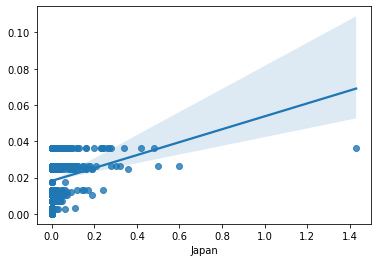

In [38]:
sns.regplot(y_test,predictions)

In [39]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Japan   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.473
Date:                Wed, 14 Sep 2022   Prob (F-statistic):            0.00245
Time:                        18:00:08   Log-Likelihood:                 1956.4
No. Observations:                1693   AIC:                            -3885.
Df Residuals:                    1679   BIC:                            -3809.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0265      0.003      7.648